In [97]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from scipy.stats import shapiro , normaltest , anderson , kstest

plt.rcParams['font.family'] = 'Malgun Gothic'

import math

In [2]:
data = pd.read_csv('./loan.csv')

In [3]:
revol = data['revol_util']

In [4]:
revol.value_counts()

0.00      13069
57.00      4324
48.00      4283
59.00      4272
61.00      4223
          ...  
54.22         1
126.60        1
21.72         1
153.70        1
145.80        1
Name: revol_util, Length: 1430, dtype: int64

In [7]:
revol.describe()

count    2.258866e+06
mean     5.033770e+01
std      2.471307e+01
min      0.000000e+00
25%      3.150000e+01
50%      5.030000e+01
75%      6.940000e+01
max      8.923000e+02
Name: revol_util, dtype: float64

In [48]:
revol.value_counts()

0.00      13069
57.00      4324
48.00      4283
59.00      4272
61.00      4223
          ...  
54.22         1
126.60        1
21.72         1
153.70        1
145.80        1
Name: revol_util, Length: 1430, dtype: int64

In [5]:
data['total_acc'].value_counts()

20.0     82570
19.0     82012
18.0     81931
17.0     81378
21.0     81170
         ...  
150.0        1
165.0        1
145.0        1
148.0        1
128.0        1
Name: total_acc, Length: 152, dtype: int64

In [6]:
data['total_acc'].describe()

count    2.260639e+06
mean     2.416255e+01
std      1.198753e+01
min      1.000000e+00
25%      1.500000e+01
50%      2.200000e+01
75%      3.100000e+01
max      1.760000e+02
Name: total_acc, dtype: float64

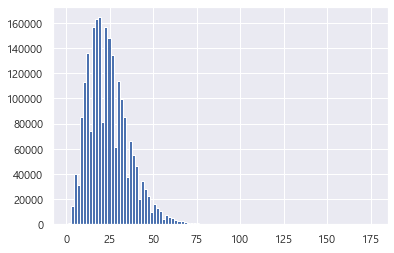

In [35]:
plt.hist(data['total_acc'], bins=100)
# plt.ylim([0, 10])
plt.show()

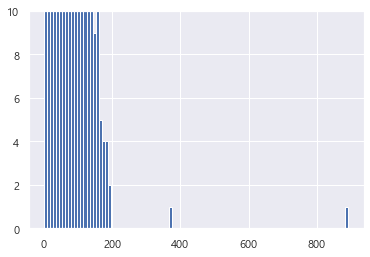

In [22]:
plt.hist(data['revol_util'], bins=100)
plt.ylim([0, 10])
plt.show()

In [13]:
data['open_acc'].describe()

count    2.260639e+06
mean     1.161240e+01
std      5.640861e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.400000e+01
max      1.010000e+02
Name: open_acc, dtype: float64

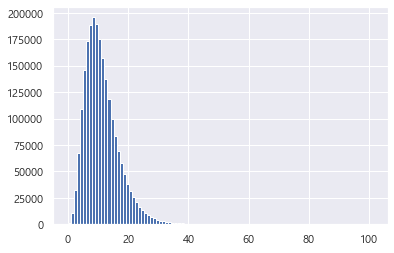

In [29]:
plt.hist(data['open_acc'], bins=100)
plt.show()

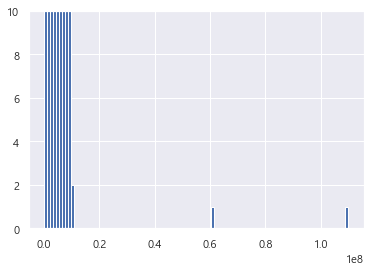

In [24]:
plt.hist(data['annual_inc'], bins=100)
plt.ylim([0, 10])
plt.show()

In [72]:
dti_describe = data['dti'].describe()

In [91]:
print(data['dti'].dtype)

float64


In [96]:
len(data['dti'].value_counts())

10845

In [101]:
stat, p  = shapiro(data['dti'].dropna().values)
p

0.0

In [102]:
data['dti'].skew().round()

29.0

In [104]:
describes = pd.DataFrame(dti_describe).T

In [105]:
describes

,count,mean,std,min,25%,50%,75%,max
dti,2258957.0,18.824196,14.183329,-1.0,11.89,17.84,24.49,999.0


In [106]:
# 컬럼명
describes.loc['dti', 'col_name'] = 'dti'

In [107]:
# unique value 개수
describes.loc['dti', 'unique_cnt'] = len(data['dti'].value_counts())

In [108]:
# 데이터 타입
describes.loc['dti', 'dtype'] = data['dti'].dtype

In [109]:
# null 값 개수
describes.loc['dti', 'null_cnt'] = data['dti'].isna().sum()

In [110]:
# 정규성검정 p-value (shapiro 검정)
stat, p  = shapiro(data['dti'].dropna().values)
describes.loc['dti', 'p_value'] = p

In [111]:
# 왜도
describes.loc['dti', 'skewness'] = data['dti'].skew().round()

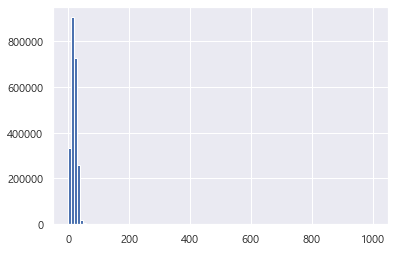

In [122]:
# 히스토그램 x축, y축
bins = max(len(data['dti'].value_counts())//100, int(describes.loc['dti', 'max']-describes.loc['dti', 'min']))
bins = min(bins, 100)

histo = plt.hist(data['dti'], bins=bins)
describes.loc['dti', 'x_axis'] = '|'.join(list(map(str, map(int, histo[0]))))
describes.loc['dti', 'y_axis'] = '|'.join(list(map(str, histo[1].round(1))))

In [123]:
describes

,count,mean,std,min,25%,50%,75%,max,col_name,unique_cnt,dtype,null_cnt,p_value,skewness,x_axis,y_axis
dti,2258957.0,18.824196,14.183329,-1.0,11.89,17.84,24.49,999.0,dti,10845.0,float64,1711.0,0.0,29.0,334430|903973|726366|258971|20517|6039|2793|16...,-1.0|9.0|19.0|29.0|39.0|49.0|59.0|69.0|79.0|89...


In [103]:
describes = pd.DataFrame(dti_describe).T

In [80]:
describes.loc['total_acc'] = pd.DataFrame(data['total_acc'].describe()).T.loc['total_acc']

In [81]:
describes

,count,mean,std,min,25%,50%,75%,max
dti,2258957.0,18.824196,14.183329,-1.0,11.89,17.84,24.49,999.0
total_acc,2260639.0,24.162552,11.987528,1.0,15.00,22.00,31.00,176.0


In [85]:
describes['col_name'] = describes.index

In [86]:
describes

,count,mean,std,min,25%,50%,75%,max,col_name
dti,2258957.0,18.824196,14.183329,-1.0,11.89,17.84,24.49,999.0,dti
total_acc,2260639.0,24.162552,11.987528,1.0,15.00,22.00,31.00,176.0,total_acc


In [52]:
data['dti'].value_counts()

0.00      1732
18.00     1584
14.40     1577
16.80     1576
19.20     1566
          ... 
157.90       1
76.07        1
173.71       1
156.80       1
93.90        1
Name: dti, Length: 10845, dtype: int64

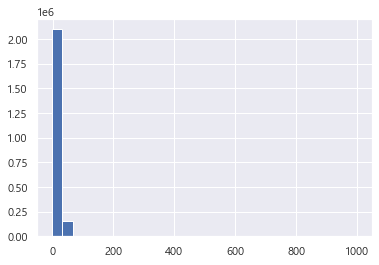

In [68]:
histo = plt.hist(data['dti'], bins=30)
# plt.ylim([0, 600])
# plt.show()
# histo

In [118]:
histo[1].round(0).dtype

dtype('float64')

In [37]:
cols = data.columns

In [41]:
cols[70:110]

Index(['total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit'],
      dtype='object')

In [43]:
chargeoff_vals = data['chargeoff_within_12_mths'].value_counts()

In [46]:
chargeoff_vals.values

array([2243339,   15765,    1115,     186,      68,      22,      12,
             8,       5,       2,       1], dtype=int64)

In [47]:
len(data['chargeoff_within_12_mths'].value_counts())

11